#Hello!
In this notebook, we will build our first ML/DL model using the first data to obtain a general idea about the user.

##Import Data set from Google Drive

In [61]:
#Import library
import pandas as pd

In [62]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/TuniHack_work"
!ls "/content/drive/MyDrive/My_work/TuniHack_work"

 data_for_model1.csv
 data_for_model2.csv
'Data_preparation&cleaning&FeatureSelection.ipynb'
 Final_data.csv
 Mental-Health-Questionnaire-2.0.csv
 Mental-Health-Survey-Form-responses.csv
 Model-A.ipynb


In [64]:
#assign data 
data_path = folder_path + "/data_for_model1.csv"
#read data
data = pd.read_csv(data_path)
data.head()

,Unnamed: 0,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how supported you feel by others around you ( your friends, family, or otherwise.)",How frequently have you been doing things that mean something to you or your life?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,0,0,1,0,3,0,0,0,1,2,3,1,0,1,0,0,2.0,1.0,0
1,1,1,0,0,3,0,1,0,2,3,3,0,1,1,1,0,2.0,3.0,1
2,2,1,0,0,3,0,1,2,1,1,3,1,2,3,1,0,3.0,3.0,1
3,3,1,0,0,3,0,0,0,1,1,1,1,2,1,1,1,1.0,3.0,0
4,4,0,0,0,3,2,1,0,1,2,3,0,0,1,1,0,4.0,4.0,0


In [65]:
#Working with features extraxted in the last notebook
df = data[["How are you feeling today?","Describe how supported you feel by others around you ( your friends, family, or otherwise.)",
        "How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",
        "How likely do you feel yourself vulnerable or lonely?",
        "How often do you get offended or angry or start crying ?",
        "Have you been eating and sleeping well?",
        "How frequently have you been doing things that mean something to you or your life?",
        "Prediction_status"]]

##Splitting/Scaling

In [66]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

In [67]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()

In [68]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

##Training using ML algorithms

In [70]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy, precision, recall, f1_scores = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1_scores[key] = f1_score(predictions, y_test)

In [72]:
# Evaluate model
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-score'] = f1_scores.values()
df_model

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.785714,0.882353,0.681818,0.769231
Support Vector Machines,0.809524,0.882353,0.714286,0.789474
Decision Trees,0.642857,0.705882,0.545455,0.615385
Random Forest,0.714286,0.705882,0.631579,0.666667
Naive Bayes,0.857143,0.705882,0.923077,0.800000
K-Nearest Neighbor,0.690476,0.647059,0.611111,0.628571


* Naive Bayes have the best f-score 

##Training using Dl algorithms

In [73]:
X.shape

(209, 18)

In [74]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 52.7% / 47.3%


In [75]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    verbose=0,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

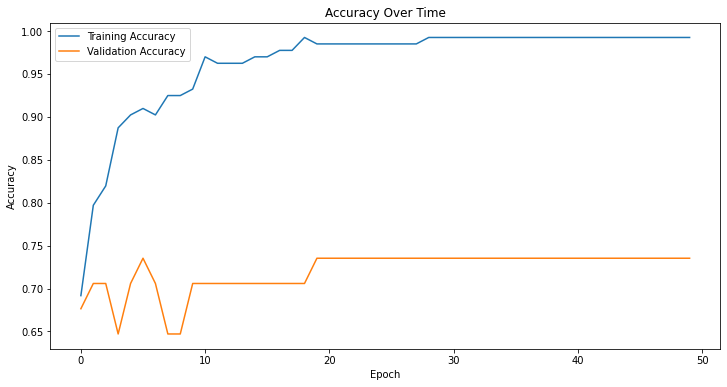

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [77]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4942 - accuracy: 0.8333 - auc: 0.9235


[0.49421364068984985, 0.8333333134651184, 0.9235294461250305]

##Results Interpretation

In [78]:
# make a prediction
ynew = model.predict(X)


7/7 [==============================] - 0s 4ms/step


In [79]:
for i in range(6):
    if((ynew[i])>0.5):
        print('Not Good!')
    else:
        print('Good!')

Good!
Not Good!
Not Good!
Good!
Good!
Good!


In [80]:
predicted=[]
for i in range(data.shape[0]):
    if ynew[i]>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [86]:
#test_labels=[1,0,1,0,1,0]
test_labels=y
cm = confusion_matrix(y_true=test_labels, y_pred=predicted)
f1 = f1_score(y_true=test_labels, y_pred=predicted)
f1

0.9201877934272301

In [82]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [83]:
cm_plot_labels = ['Not Good!','Good!']


Confusion matrix, without normalization
[[94 10]
 [ 7 98]]


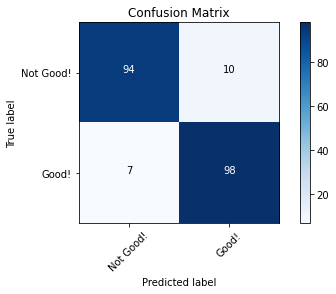

In [84]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')